In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt

## Import Data Field

In [2]:
input_path = "C:/Users/Lindsey/Desktop/Daily-Bruin/the-stack/datasets/student-demographics-hsis/"

In [3]:
df = pd.read_csv(input_path + "TotalGrantMoneyPerCampusPerYear.csv", encoding="ISO-8859-1",  index_col=0)

In [4]:
df.head(15)

,Year,Campus,Number of Awards,Dollar Amount of Awards
Index,,,,
1,2005-06,Merced,41,4949249
2,2005-06,Riverside,487,57030198
3,2005-06,Santa Cruz,571,107616355
4,2005-06,Santa Barbara,710,124662796
5,2005-06,Irvine,994,206694535
6,2005-06,Berekely,1296,282132054
7,2005-06,Davis,2175,392605188
8,2005-06,San Diego,1900,498921291
9,2005-06,Los Angeles,2513,611900412


## Sort Data

In [10]:
def DollarAwards(Input):
    '''
    Takes data field, sorts by entry, makes a list of 2 columns, zips columns together
    Parameter, sort entry
    '''
    df_sorted = df[df["Campus"] == Input ]
    Dollars = tuple(df_sorted["Dollar Amount of Awards"])
    Years = tuple(df_sorted["Year"])
    return tuple(zip(Years, Dollars))

In [11]:
#List of campuses for reference
Campuses = ("Berkeley", "Davis", "Irvine", "Los Angeles", "Merced","Riverside","San Diego","Santa Cruz", "Santa Barbara")
#Create a dictionary with campuses as keys and zipped tuple as value
d={}
for campus in Campuses:
    d[campus] = DollarAwards(campus)
print(d["Santa Barbara"]) #test

(('2005-06', 124662796), ('2006-07', 172110074), ('2007-08', 194554258), ('2008-09', 174650492), ('2009-10', 224327056), ('2010-11', 184412889), ('2011-12', 217949054), ('2012-13', 165537822), ('2013-14', 207820520), ('2014-15', 186288912), ('2015-16', 184100944), ('2016-17', 183821630), ('2017-18', 209570660), ('2018-19', 215565363), ('2019-20', 234932336))


## Create JSON

In [12]:
import json
def tojson(Input):
    '''
    Start with a key in a dictionary, make a tuple that is equal to dict value, convert to json
    '''
    tuple = d[Input]
    with open('Total' + Input + '.json', 'w') as json_file:
        json.dump(tuple, json_file, sort_keys=True, indent=4)

In [13]:
#Loop create jsons for each campus
for item in d.keys():
    tojson(item)

## Test Visuals

In [5]:
def VizAwards(Input):
    df_sorted = df[df["Campus"] == Input ]
    return df_sorted["Dollar Amount of Awards"]

In [8]:
Campuses = ["Berekeley", "Davis", "Irvine", "Los Angeles", "Merced","Riverside","San Diego","Santa Cruz", "Santa Barbara"]
dViz={}
for campus in Campuses:
    dViz[campus] = VizAwards(campus)
DollarsBerkeley = VizAwards("Berkeley")
DollarsSanBar = VizAwards("Santa Barbara")

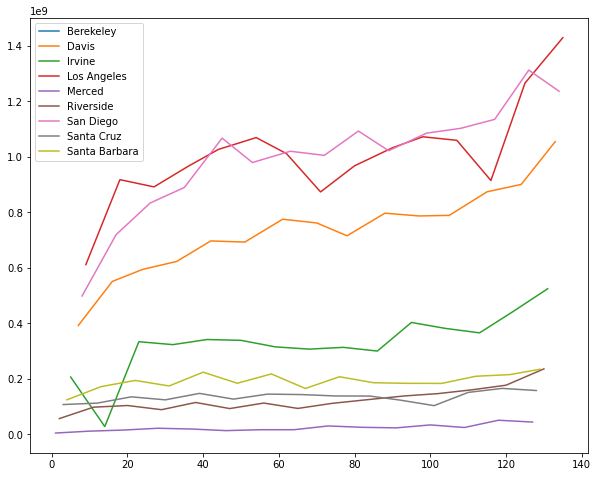

In [9]:
plt.figure(figsize=(10, 8))
for item in dViz.keys():
    plt.plot(dViz[item], label = item)
plt.legend()

Series([], Name: Dollar Amount of Awards, dtype: int64)